# Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
train_df = pd.read_csv("dataset/train.csv")

In [4]:
len(train_df)

13179

In [5]:
train_df['text'][0]

'b\'From: kadie@cs.uiuc.edu (Carl M Kadie)\\nSubject: Re: Organized Lobbying for Cryptography\\n\\nkubo@zariski.harvard.edu (Tal Kubo) writes:\\n\\n[...]\\n>The EFF has been associated with efforts to prevent the banning of sex\\n>and pictures newsgroups at various universities.\\n[...]\\n\\nSo what? Justices William Brennan, Thurgood Marshall, John Paul\\nStevens, and Byron White are associated with a plurality Supreme Court\\ndecision that prevented the removal of "anti-American, anti-Christian,\\nanti-Semitic, and just plain filthy" books from a public high school\\nlibrary [_Board of Education v. Pico_ (1982)]. Does this mean that\\nthey could no longer defend free expression and privacy?\\n\\n- Carl\\n-- \\nCarl Kadie -- I do not represent any organization; this is just me.\\n = kadie@cs.uiuc.edu =\\n\''

### Word removals, regex

In [6]:
newline_regex = re.compile(r"\\n")
english_stop_words = set(stopwords.words('english'))

train_df['text'] = train_df['text'].apply(lambda x: ' '.join([word for word in x.split() if not word.isdigit()])) #removes standalone digits
train_df['text'] = train_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stop_words])) #removes english stopwords
train_df['text'] = train_df['text'].apply(lambda x: newline_regex.sub(" ", x)) #remove all escape characters

In [8]:
train_df['text'][0]

'b\'From: kadie@cs.uiuc.edu (Carl M Kadie) Subject: Re: Organized Lobbying Cryptography  kubo@zariski.harvard.edu (Tal Kubo) writes:  [...] >The EFF associated efforts prevent banning sex >and pictures newsgroups various universities. [...]  So what? Justices William Brennan, Thurgood Marshall, John Paul Stevens, Byron White associated plurality Supreme Court decision prevented removal "anti-American, anti-Christian, anti-Semitic, plain filthy" books public high school library [_Board Education v. Pico_ (1982)]. Does mean that they could longer defend free expression privacy?  - Carl --  Carl Kadie -- I represent organization; me.  = kadie@cs.uiuc.edu = \''

In [ ]:
# train_df = train_df[['text', 'categories']]

In [9]:
len(train_df)

13179

In [10]:
train_df.to_csv("dataset/new_train.csv", index=False, header=True)

## Basic Analysis (After Preprocessing)

In [11]:
preferred_categories = [
            'alt.atheism',
            'soc.religion.christian',
            'comp.graphics',
            'sci.med',
            'talk.politics.guns'
]

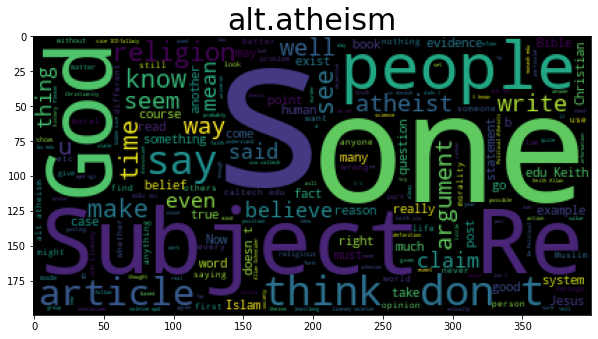

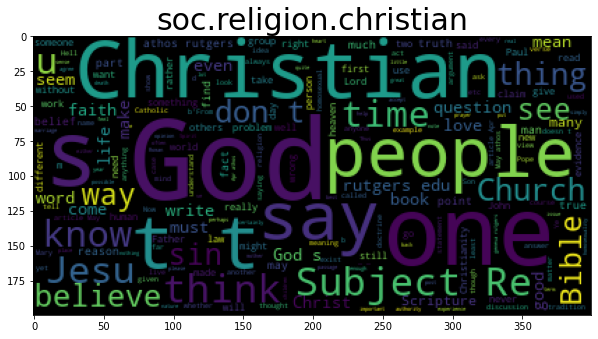

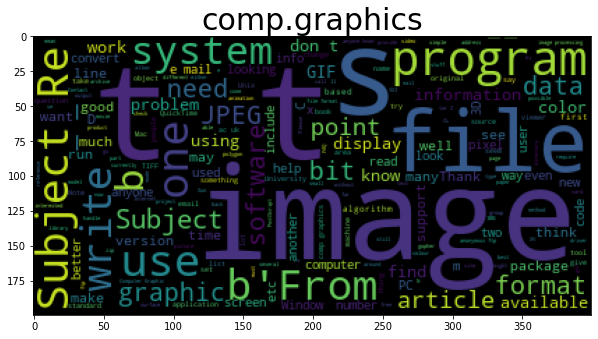

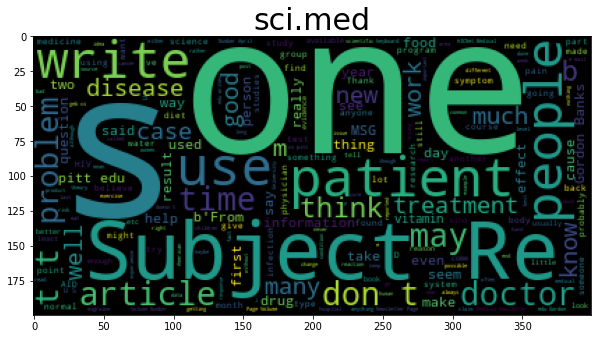

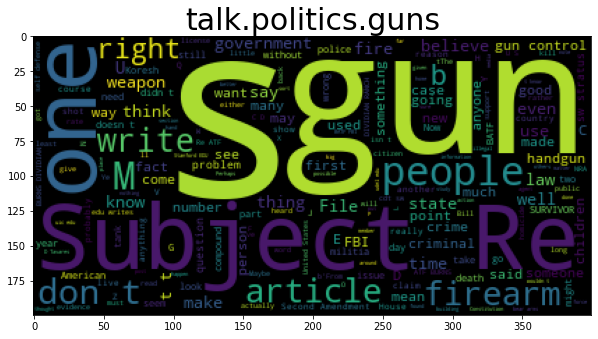

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for each_preferred_category in preferred_categories:
    wc = WordCloud().generate(' '.join(train_df[train_df['categories'] == each_preferred_category]['text']))
    plt.figure(figsize=(10, 10))
    plt.title(each_preferred_category, fontsize=30)
    plt.imshow(wc)